# 4주차 EDA 과제
- 데이터: [kaggle 당뇨 예측 데이터](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

## 01 패키지 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 02 데이터 가져오기

In [2]:
df = pd.read_csv('./diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## 03 데이터 살펴보기

### 3-1) 데이터 상태 살피기
- 결측치 없음
- `gender`, `smoking_history` 변수는 분석을 위한 인코딩 필요함

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


### 3-2) 전체 데이터

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


변수별 상관도

In [6]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


### 3-3) 개별 데이터 분석

#### (1) 성별:  `gender`
- 성별 간 큰 차이는 없으나 남성의 유병률이 약 2%p 높음
- `gender`가 Other인 경우는 `diabetes`와 연관이 없으므로, 제외하는 것이 분석에 도움이 될 듯 함

In [7]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

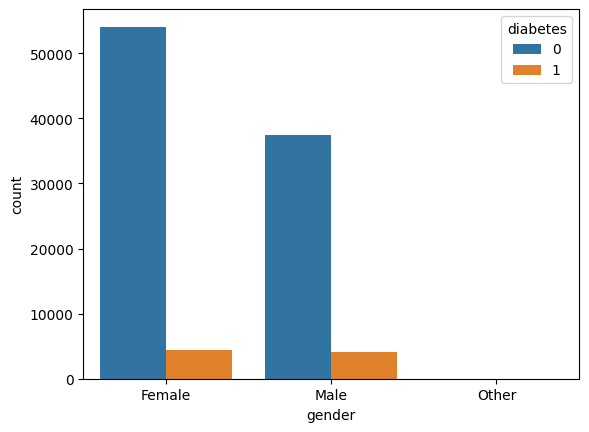

In [8]:
sns.countplot(data=df, x='gender', hue='diabetes')
plt.show()

In [9]:
df.groupby('gender')['diabetes'].mean() * 100

gender
Female    7.618869
Male      9.748974
Other     0.000000
Name: diabetes, dtype: float64

#### (2) 나이: `age`
- 나이가 많아질 수록 유병률이 상승하는 경향이 보임
- 상관도 0.25, 다른 요인의 개입이 더 큰 영향을 미치는 것으로 보임

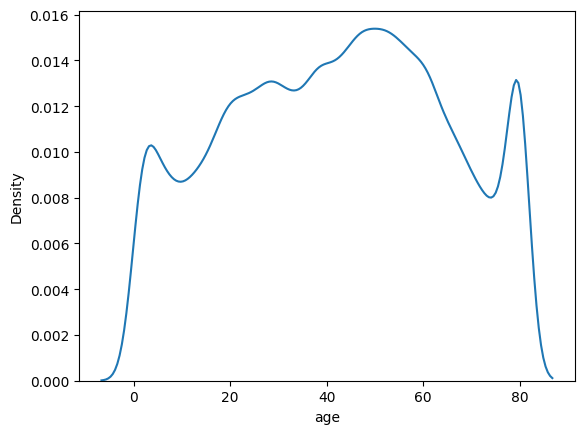

In [10]:
sns.kdeplot(data=df, x='age')
plt.show()

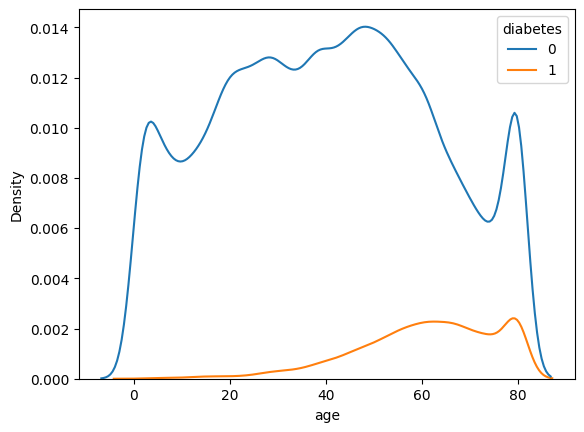

In [11]:
sns.kdeplot(data=df, x='age', hue='diabetes')
plt.show()

#### (3) 고혈압: `hypertension`
- 고혈압이 있는 사람들의 유병률이 없는 사람들의 유병률보다 약 20%p 높음
- `고혈압-당뇨`의 상관도 0.19로 약한 양의 상관관계
- `고혈압-나이`의 상관도가 0.25 정도인 것으로 보아 나이와의 상관성을 분석할 필요가 있음

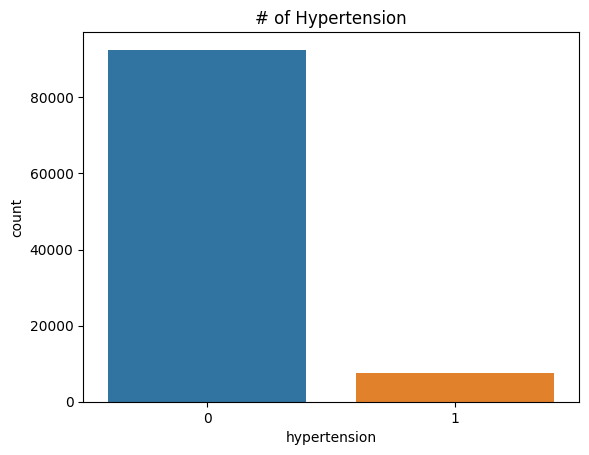

In [12]:
sns.countplot(data=df, x='hypertension')
plt.title('# of Hypertension')
plt.show()

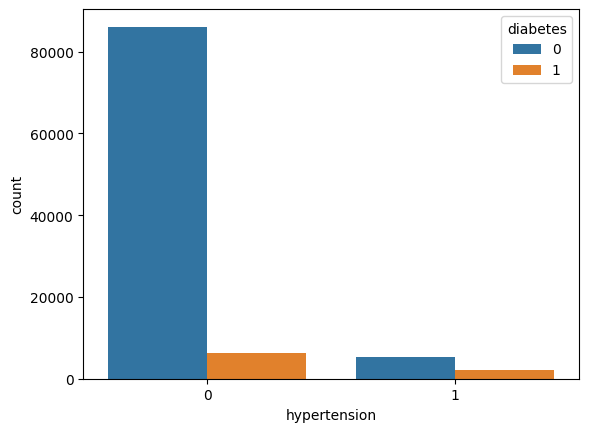

In [13]:
sns.countplot(data=df, x='hypertension', hue='diabetes')
plt.show()

In [14]:
df.groupby('hypertension')['diabetes'].mean() * 100

hypertension
0     6.930768
1    27.895792
Name: diabetes, dtype: float64

#### (4) 심장병력: `heart_disease`
- 심장병력이 있는 사람의 유병률이 25%p 높음
- `심장병력-당뇨` 상관도 0.17

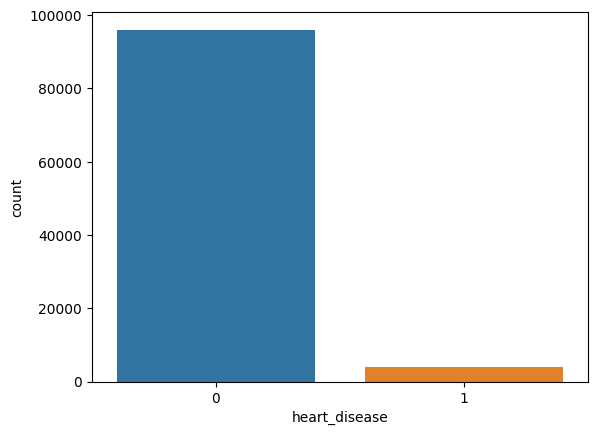

In [15]:
sns.countplot(data=df, x='heart_disease')
plt.show()

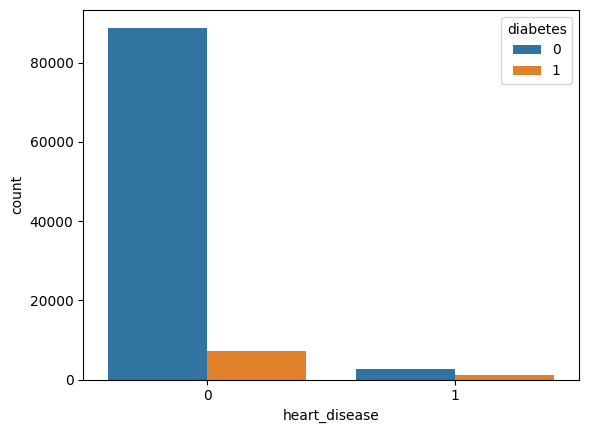

In [16]:
sns.countplot(data=df, x='heart_disease', hue='diabetes')
plt.show()

In [17]:
df.groupby('heart_disease')['diabetes'].mean() * 100

heart_disease
0     7.529826
1    32.141045
Name: diabetes, dtype: float64

#### (5) 흡연경력: `smoking_history`
- 흡연경력이 있는 사람의 유병률이 미세하게 낮으나, 큰 영향이 있는 것 같지는 않음

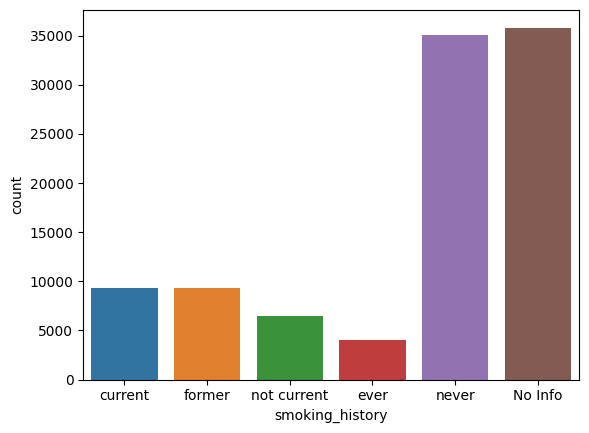

In [18]:
sns.countplot(data=df, x='smoking_history', order=['current', 'former', 'not current', 'ever', 'never', 'No Info'])
plt.show()

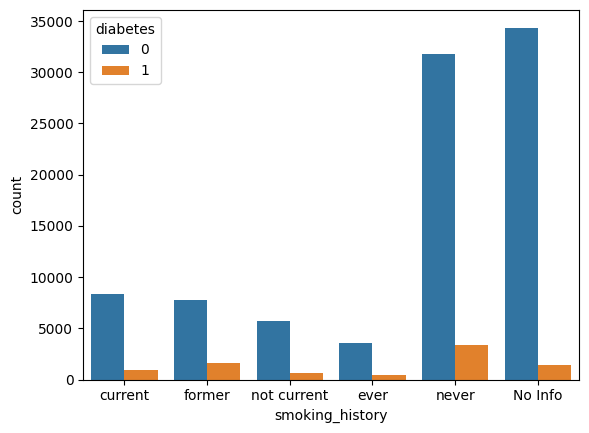

In [19]:
sns.countplot(data=df, x='smoking_history', order=['current', 'former', 'not current', 'ever', 'never', 'No Info'], hue='diabetes')
plt.show()

In [20]:
df.groupby('smoking_history')['diabetes'].mean() * 100

smoking_history
No Info         4.059638
current        10.208917
ever           11.788212
former         17.001711
never           9.534122
not current    10.702652
Name: diabetes, dtype: float64

In [21]:
### 피운 경험이 있다 없다로 구분
# Yes: current, ever, former, not current
# No : Never
smoking_exp = {'current':'Yes', 'not current':'Yes', 'ever':'Yes', 'former':'Yes', 'never':'No', 'No Info':'No Info'}

df['smoking_exp'] = df.smoking_history.apply(lambda x: smoking_exp[x])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_exp
0,Female,80.0,0,1,never,25.19,6.6,140,0,No
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No Info
2,Male,28.0,0,0,never,27.32,5.7,158,0,No
3,Female,36.0,0,0,current,23.45,5.0,155,0,Yes
4,Male,76.0,1,1,current,20.14,4.8,155,0,Yes


In [22]:
df.groupby('smoking_exp')['diabetes'].mean() * 100

smoking_exp
No          9.534122
No Info     4.059638
Yes        12.719585
Name: diabetes, dtype: float64

#### (6) BMI: `bmi`
- 

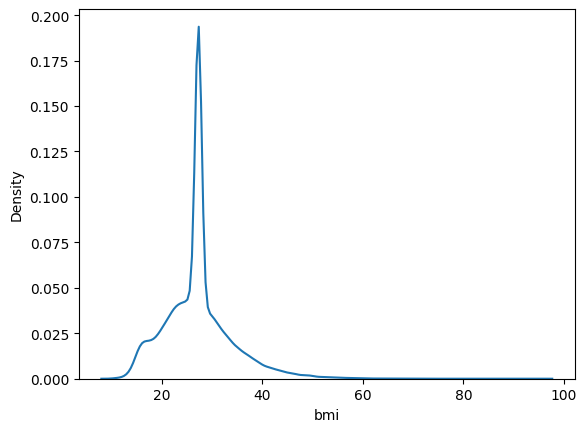

In [23]:
sns.kdeplot(data=df, x='bmi')
plt.show()

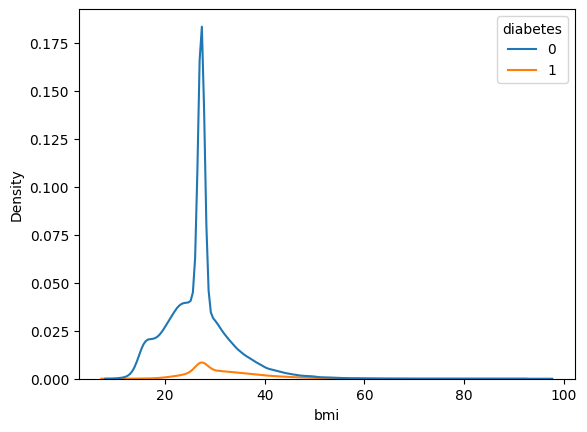

In [24]:
sns.kdeplot(data=df, x='bmi', hue='diabetes')
plt.show()

#### (7) 당화헤모글로빈: `HbA1c_level`
- 애초에 그 수치가 높은 사람이 당뇨...
- 수치가 겹치는 부분에 대한 구분법이 필요

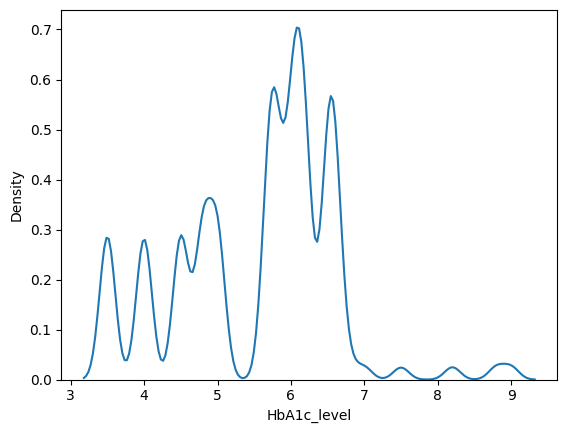

In [25]:
sns.kdeplot(data=df, x='HbA1c_level')
plt.show()

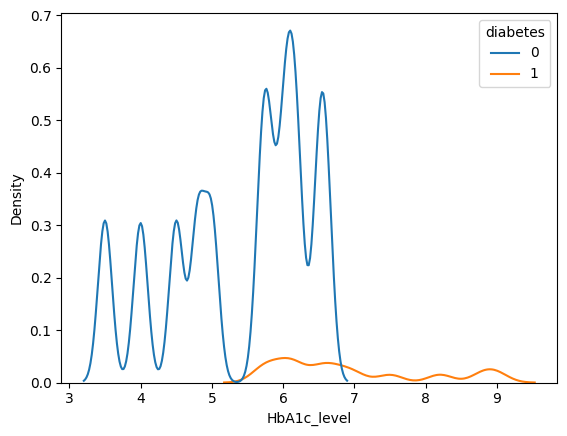

In [26]:
sns.kdeplot(data=df, x='HbA1c_level', hue='diabetes')
plt.show()

#### (8) 혈당수치: `blood_glucose_level`
- 헤모글로빈과 동일...
- 역시 겹치는 부분에 대한 구분이 필요

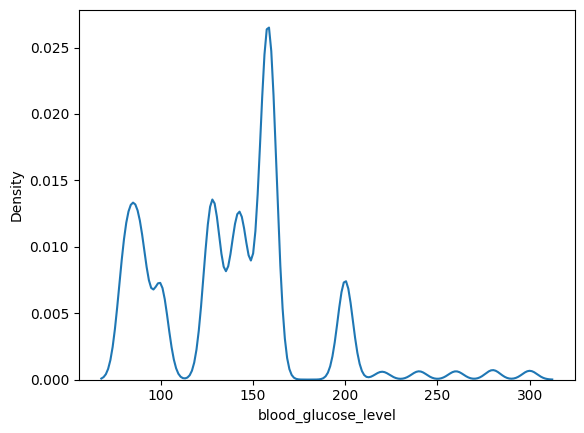

In [27]:
sns.kdeplot(data=df, x='blood_glucose_level')
plt.show()

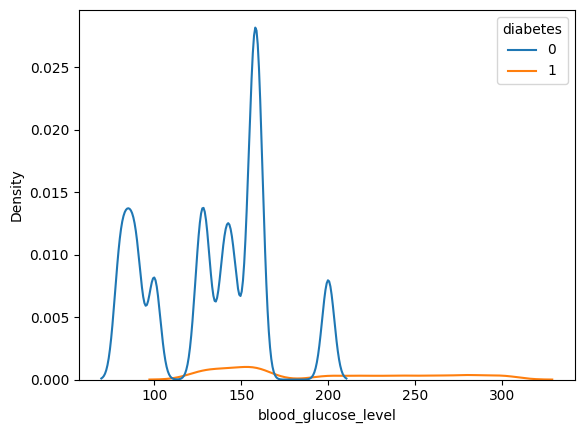

In [28]:
sns.kdeplot(data=df, x='blood_glucose_level', hue='diabetes')
plt.show()

### 3-4) 복합 데이터 분석
- 가설
    - 성별 자체에는 차이가 없을 것
    - 나이가 많을 수록 당뇨 유병률이 높을 것이나, 그 영향이 크지는 않을 것
    - 고혈압/심장병력과 당뇨 유병률은 양의 상관관계가 있을 것
    - 흡연경력과 당뇨 유병률은 유의미한 상관관계가 없을 것
    - BMI/당화헤모글로빈/혈당수치는 유의미한 상관관계가 있을 것
    - 

#### (0) 연속성 변수들의 양자화

In [29]:
def get_bin_ranges(bins=[], is_pos=True):

    if isinstance(bins, list):
        if is_pos:
            return [(0, bins[0])] + [(bins[i], bins[i+1]) for i in range(len(bins)-1)]
        else:
            return [(bins[i], bins[i+1]) for i in range(len(bins)-1)]


def set_bin(x, bin_ranges:list=[], is_pos=True):
        
    l = len(bin_ranges)
    i = 0

    if is_pos:
        while i < l:
            if (x >= bin_ranges[i][0]) and (x < bin_ranges[i][1]):
                return i
            else:
                i += 1
                continue
        return i
    
    else:
        while i < l:
            if x < bin_ranges[i][0]:
                return i
            
            else:
                if (x >= bin_ranges[i][0]) and (x < bin_ranges[i][1]):
                    return i + 1

                else:
                    i += 1
                    continue

bins = [2, 4, 6, 8]
print(get_bin_ranges(bins))
set_bin(10, get_bin_ranges(bins))

[(0, 2), (2, 4), (4, 6), (6, 8)]


4

In [30]:
df.describe().iloc[:, :-4]

,age,hypertension,heart_disease
count,100000.000000,100000.00000,100000.000000
mean,41.885856,0.07485,0.039420
std,22.516840,0.26315,0.194593
min,0.080000,0.00000,0.000000
25%,24.000000,0.00000,0.000000
50%,43.000000,0.00000,0.000000
75%,60.000000,0.00000,0.000000
max,80.000000,1.00000,1.000000


In [31]:
age_bin_range = get_bin_ranges(list(range(10, 100, 15)))
bmi_bin_range = get_bin_ranges(list(range(10, 101, 10)))
hba_bin_range = get_bin_ranges(list(np.arange(3, 10, 1.3)))
glu_bin_range = get_bin_ranges(list(range(80, 310, 25)))

print(f'age_bin:{age_bin_range}')
print(f'bmi_bin:{bmi_bin_range}')
print(f'hba_bin:{hba_bin_range}')
print(f'glu_bin:{glu_bin_range}')

df['age_bin'] = df.age.apply(lambda x: set_bin(x, age_bin_range))
df['bmi_bin'] = df.bmi.apply(lambda x: set_bin(x, bmi_bin_range))
df['hba1c_bin'] = df.HbA1c_level.apply(lambda x: set_bin(x, hba_bin_range))
df['glu_bin'] = df.blood_glucose_level.apply(lambda x: set_bin(x, glu_bin_range))

age_bin:[(0, 10), (10, 25), (25, 40), (40, 55), (55, 70), (70, 85)]
bmi_bin:[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
hba_bin:[(0, 3.0), (3.0, 4.3), (4.3, 5.6), (5.6, 6.8999999999999995), (6.8999999999999995, 8.2), (8.2, 9.5)]
glu_bin:[(0, 80), (80, 105), (105, 130), (130, 155), (155, 180), (180, 205), (205, 230), (230, 255), (255, 280), (280, 305)]


In [32]:
# 각 변수 구간별 당뇨 유병률

for i in ['age_bin', 'hypertension', 'heart_disease', 'bmi_bin', 'hba1c_bin', 'glu_bin']:
    print(df.groupby(i)['diabetes'].mean() * 100)
    print()

age_bin
0     0.225364
1     0.824909
2     2.831344
3     8.161431
4    17.385580
5    20.135593
Name: diabetes, dtype: float64

hypertension
0     6.930768
1    27.895792
Name: diabetes, dtype: float64

heart_disease
0     7.529826
1    32.141045
Name: diabetes, dtype: float64

bmi_bin
1     1.074735
2     6.427107
3    16.061327
4    25.123795
5    29.041916
6    31.958763
7    30.000000
8    50.000000
9     0.000000
Name: diabetes, dtype: float64

hba1c_bin
1      0.000000
2      0.000000
3      8.909832
4    100.000000
5    100.000000
Name: diabetes, dtype: float64

glu_bin
1      0.000000
2      8.257595
3      8.528334
4      6.521016
5      8.513158
6    100.000000
7    100.000000
8    100.000000
9    100.000000
Name: diabetes, dtype: float64



#### (1) HbA1c vs blood_glucose
- 두 변수 사이의 상관도는 크지 않으나, 당뇨 판정에 결정적인 수치

In [33]:
df[['HbA1c_level', 'blood_glucose_level']].corr('pearson')

,HbA1c_level,blood_glucose_level
HbA1c_level,1.000000,0.166733
blood_glucose_level,0.166733,1.000000


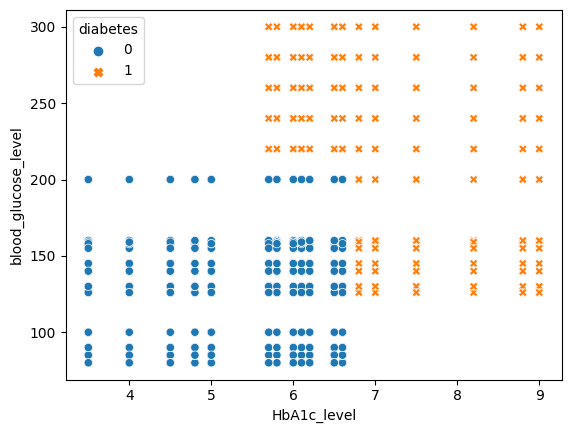

In [34]:
sns.scatterplot(df, x='HbA1c_level', y='blood_glucose_level', hue='diabetes', style='diabetes')
plt.show()

#### (2) 나이 vs 고혈압
- 나이가 많을 수록 고혈압 많음

In [35]:
df.groupby('age_bin')['hypertension'].mean().reset_index()

,age_bin,hypertension
0,0,0.000307
1,1,0.002233
2,2,0.023773
3,3,0.078019
4,4,0.145047
5,5,0.187571


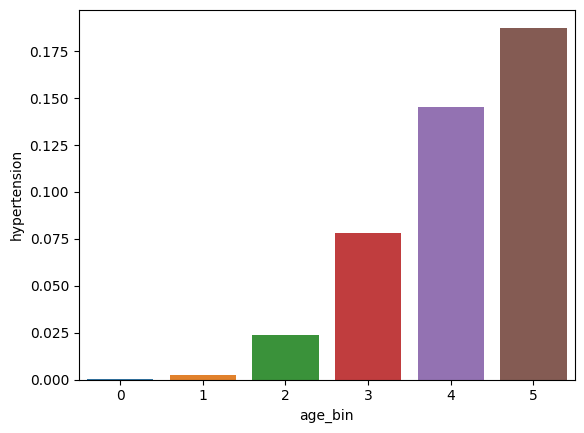

In [36]:
sns.barplot(df.groupby('age_bin')['hypertension'].mean().reset_index(), x='age_bin', y='hypertension')
plt.show()

#### (3) 흡연경력 vs 고혈압/심장병력
- 

In [187]:
df[df.smoking_exp != 'No Info'].smoking_exp.value_counts()

smoking_exp
No     35095
Yes    29089
Name: count, dtype: int64